<h1>KUIS 2.1 Pembelajaran Mesin</h1>

Tentang dataset:
Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatn tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label #N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

Ketentuan:
1. Pengerjaan secara individu alias setiap mahasiswa!
2. terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3. Tidak boleh ada duplikasi pekerjaan antar mahasiswa (evaluasi pemahaman pengerjaan kuis 2 dilaksanakan pada Minggu ke-14)
Soal:
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Tentukan data validasi! (5 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)
7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)
8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')

df = df.replace(np.nan, 0, regex=True)

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


<h2>VISUALISASI DATA</h2>

TIDAK ADA    77
ADA           8
Name: luaran_hki, dtype: int64


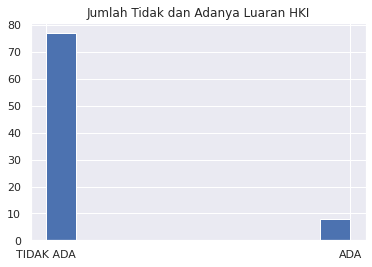

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df['luaran_hki'].value_counts()
print(data)

df['luaran_hki'].hist()
plt.title('Jumlah Tidak dan Adanya Luaran HKI')
sns.set()


REGULER      80
KEMITRAAN     5
Name: skema, dtype: int64


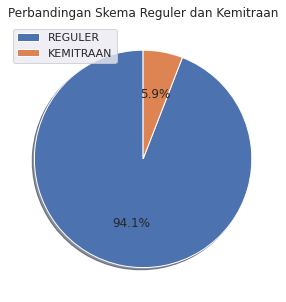

In [29]:

data = df['skema'].value_counts()
print(data)

plt.figure(figsize=(5,5))
plt.pie(data, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Perbandingan Skema Reguler dan Kemitraan')
plt.legend(data.index)
plt.show()

Text(0, 0.5, 'Jumlah')

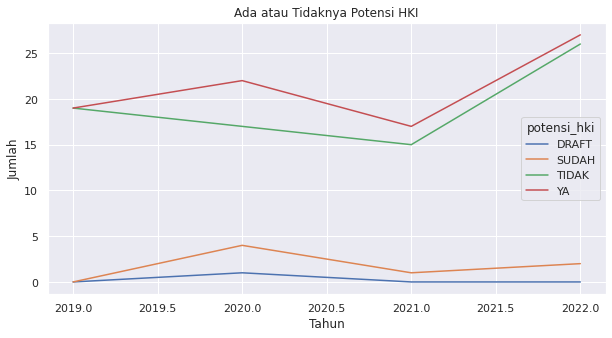

In [30]:
potensi = df['potensi_hki']
tahun = df['tahun']

Tabel = pd.crosstab(tahun ,potensi)

Tabel.plot(kind='line', stacked=True, figsize=(10,5))
plt.title('Ada atau Tidaknya Potensi HKI')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')

(array([2018. , 2018.5, 2019. , 2019.5, 2020. , 2020.5, 2021. , 2021.5,
        2022. , 2022.5, 2023. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

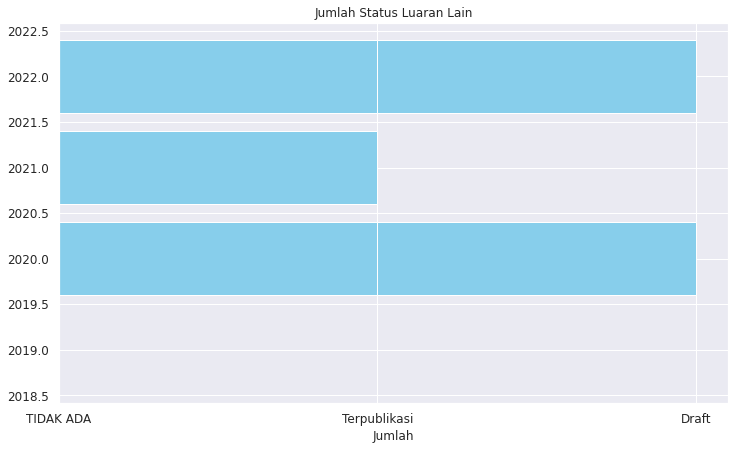

In [31]:
tahun = df['tahun']
status_luaran_lain = df['status_luaran_lain']

plt.figure(figsize=(12,7))
plt.barh(tahun, status_luaran_lain, color='skyblue')

plt.title('Jumlah Status Luaran Lain')
plt.xlabel('Jumlah')
plt.xticks(size=12)
plt.yticks(size=12)

Text(0, 0.5, 'Jumlah')

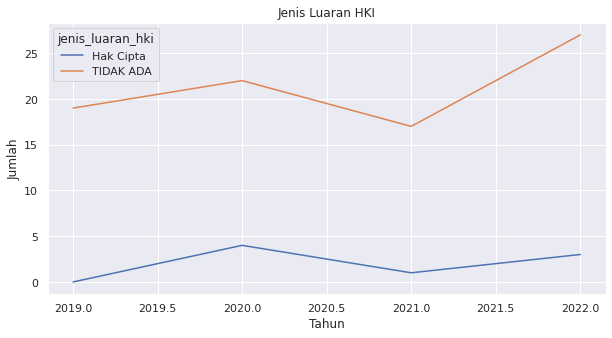

In [32]:
luaran_hki = df['jenis_luaran_hki']
tahun = df['tahun']

Tabel = pd.crosstab(tahun ,luaran_hki)

Tabel.plot(kind='line', stacked=True, figsize=(10,5))
plt.title('Jenis Luaran HKI')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')


<h2>Pemilahan data training dan testing yang sesuai dan proporsional dari data</h2>

In [33]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['keterlibatan_vltr'] = LE.fit_transform(df['keterlibatan_vltr'])
df['jml_vltr_terlibat'] = LE.fit_transform(df['jml_vltr_terlibat'])
df['skema'] = LE.fit_transform(df['skema'])
df['luaran_hki'] = LE.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = LE.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = LE.fit_transform(df['potensi_hki'])
df['luaran_lain'] = LE.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain'] = LE.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = LE.fit_transform(df['status_luaran_lain'])

# drop kolom keterlibatan_vltr
X = df.drop(['keterlibatan_vltr'], axis = 1)
y = df['keterlibatan_vltr']

X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>Data Validasi</h2>

In [34]:
# Implementasi k-fold cross validation stratified
from sklearn.model_selection import train_test_split, StratifiedKFold

# Split train test
df_train2, df_test2 = train_test_split(df, test_size=0.2, random_state=0)

# Inisiasi obyek StratifiedKFold
skf2 = StratifiedKFold(n_splits=4)
print(f'Jumlah fold: {skf2.get_n_splits()}')
print(f'Obyek SKFold: {skf2}')

# Melakukan split train menjadi train dan validasi
skf2_split = skf2.split(df_train2, df_train2['keterlibatan_vltr'])
print(f'Jumlah data df: {len(df_train2)}')

# Mengecek data tiap fold
for train_index, test_index in skf2_split:
    print(f'Index train: {train_index} | Index test:{test_index}')

Jumlah fold: 4
Obyek SKFold: StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 68
Index train: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 31 32 33 35 36 37 39
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test:[17 18 19 20 21 22 23 24 25 26 27 28 29 30 34 38 40]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 34 38 40 50 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test:[31 32 33 35 36 37 39 41 42 43 44 45 46 47 48 49 51]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51] | Index test

<h2>Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan</h2>

In [35]:
# Mengimpor Klasifikasi Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Memanggil model decision tree dengan nama dt dan berparamater
# Parameter yang digunakan yaitu kedalaman maksimum = 6 dan menggunakan random state/kolom = 1
dt = DecisionTreeClassifier(max_depth = 6, random_state = 1)

# Menggunakan fungsi fit untuk menyesuaikan model dt dengan data training
dt.fit(X_train, y_train)

# Menentukan hasil prediksi dari x_test
y_pred_dt = dt.predict(X_test)

# Menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.0


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Sesuaikan rf ke set training
rf = RandomForestClassifier(n_estimators=20, random_state=5)
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

# Menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.9230769230769231


In [37]:
# Menghitung perbandingan Decision Tree dengan Random Forest
print('Perbandingan antara Decision Tree dan Random Forest : ',(accuracy_score(y_test, y_pred_dt)-accuracy_score(y_test, y_pred_rf)))

Perbandingan antara Decision Tree dan Random Forest :  0.07692307692307687


<h2>Terapkan sebuah metode prediksi serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan</h2>

In [38]:

A= df[['keterlibatan_vltr','jml_vltr_terlibat','skema','jenis_luaran_hki','luaran_lain','potensi_hki','status_luaran_lain','jenis_luaran_lain']]
b = df['luaran_hki']

#training data
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=3)

from sklearn.tree import DecisionTreeRegressor

# Inisiasi Decision Tree
dt = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)
dt.fit(A_train,b_train)

# Fit ke dalam training set
DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)

from sklearn.metrics import mean_squared_error

# compute b_pred
b_pred = dt.predict(A_test)

#compute mse_dt
mse_dt = mean_squared_error(b_test,b_pred)

#compute rmse_dt
rmse_dt = mse_dt ** (1/2)

#Print rmse_dt
print("Test set Akurasi : {:.2f}".format(rmse_dt))

Test set Akurasi : 0.26


<h2>Membuat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4</h2>

Confusion Matrix Decision Tree : 1.0
Confusion Matrix Random Forest : 0.9615384615384616
Confusion Matrix Decision Tree


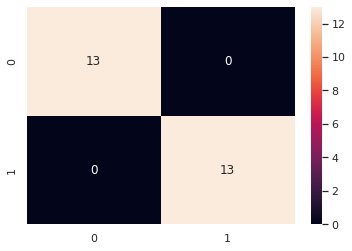

Confusion Matrix Random Forest


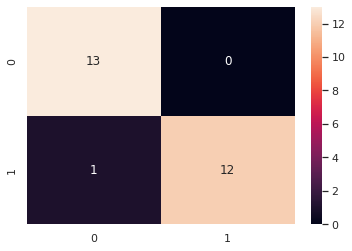

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# Decision Tree
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

# Random Forest
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('Confusion Matrix Decision Tree :',dt.score(X_test, y_test))
print('Confusion Matrix Random Forest :',rfc.score(X_test,y_test))

print('Confusion Matrix Decision Tree')
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.show()

print('Confusion Matrix Random Forest')
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True)
plt.show()

DecisionTree ROC:  1.0
Random Forest ROC:  1.0


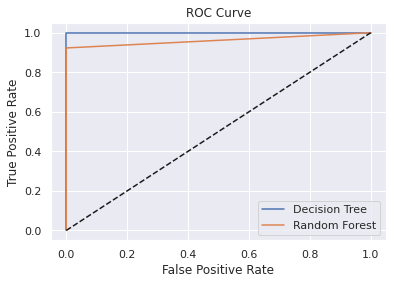

In [40]:


clf_tree = DecisionTreeClassifier();
clf_rand = RandomForestClassifier();

clf_tree.fit(X_train, y_train); 
clf_rand.fit(X_train, y_train);

y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_rand.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

print('DecisionTree ROC: ', roc_auc_score(y_test, y_score1))
print('Random Forest ROC: ', roc_auc_score(y_test, y_score2))

fpr, tpr, thresholds = roc_curve(y_test, pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, rfc_pred)
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<h2>Melakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search</h2>

In [41]:
# GridSearch menggunakan Decission Tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

#inisiasi repeated k-fold
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

# Definisikan hyperparameter yang akan digunakan
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(clf_tree, param_grid=params, cv=cv)

# Fit / latih berdasarkan grid
%timeit grid.fit(X,y)

# Evaluasi dengan score
score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter : {grid.best_params_}')

2.26 s ± 295 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter : {'criterion': 'gini', 'max_depth': 6}


In [42]:
# Random search menggunakan Decission Tree
from sklearn.model_selection import RandomizedSearchCV

# Definisikan hyperparameter yang akan digunakan
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
random = RandomizedSearchCV(clf_tree, params, cv=cv)

# Fit / latih berdasarkan random
%timeit random.fit(X,y)

# Evaluasi dengan score
score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter : {random.best_params_}')

934 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter : {'max_depth': 6, 'criterion': 'entropy'}


In [43]:
# Exhausive Search menggunakan Decission Tree
model_dt_manual = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10)

%timeit model_dt_manual.fit(X, y)

# Evaluasi dengan score
score = model_dt_manual.score(X,y)

print(f'Hasil evaluasi: {score}')

3.51 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Hasil evaluasi: 1.0


<h2>Visualisasi berdasarkan nomor 4 dan 5</h2>

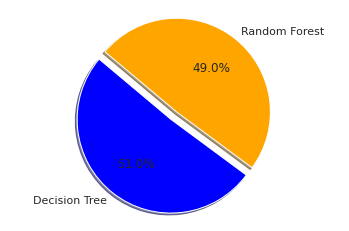

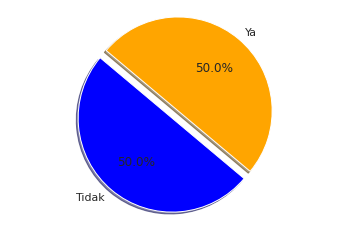

In [44]:
# Membuat Visualisasi Perbandingan antara Decision Tree dan Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Decision Tree', 'Random Forest'
sizes = [accuracy_score(y_test, pred), accuracy_score(y_test, rfc_pred)]
colors = ['blue', 'orange']
explode = (0.1, 0)  # explode 1st slice\p

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


# Visualisasi Hasil Prediksi
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Tidak', 'Ya'
sizes = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, rfc_pred)]
colors = ['blue', 'orange']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()